
##### **Notebook Overview**

In this notebook I will show how to set up a basic Linear Regression model using Scikit-Learn and use Matplotlib to visualize the results following RegenerativeToday yt tutorial(link below). This is meant to illustrate the concept, and provide a basic understanding of how machine learning works even if the result was not as satisfactory due the lack of patterns in rentals prices within our dataset. The focus is on learning, not perfection, and to create a foundation for more advanced projects in the future.
###### RegenerativeToday video (https://www.youtube.com/watch?v=feDJkDaNuOk)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Loading our csv file in a pandas data frame.

In [ ]:
plt.close("all")
catalogFilePath = os.path.join("..","data", "catalog.csv")
catalog = pd.read_csv(catalogFilePath)
#Quick way to remember the content of our dataset
display(catalog[["total_monthly_value", "property_size"]].head(5))

,total_monthly_value,property_size
0,4201,67
1,1560,50
2,4039,72
3,1513,79
4,3000,80


### Linear Regression Model ::

The linear regression model uses the y = mx + c approach, for a dependent variable Y, it finds a relationship with one or more independent variables X. This is capable, because the model analyzes correlations between X and Y in the dataset, than the model fits a straight line to the data points in the XY plane. This line can then be used to predict future values of Y from new X values.


The first step by setting up this model it's to select the Dependent and Independent variables, y and x, that in our case will be, the base rent and the m² of the property.

Text(0, 0.5, 'property size')

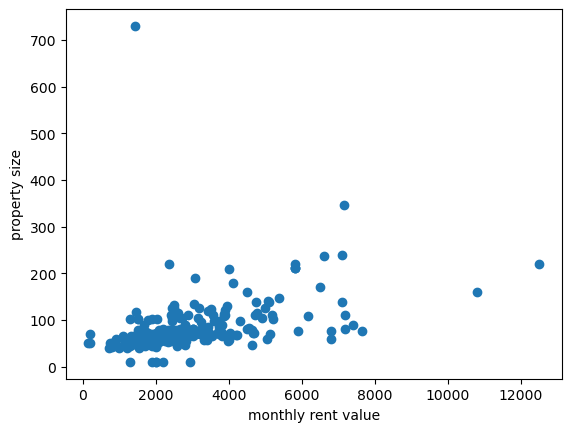

In [ ]:
X = catalog[["total_monthly_value"]]
y = catalog[["property_size"]]
plt.scatter(X, y)
plt.xlabel("monthly rent value")
plt.ylabel("property size")

As we can see, we got some outliers, which are data points that are in a large discrepancy whitin the others in the same range, also we've got an BASE trend difference, this is, the X values and y values starts to be more and more distant, and both of these things are not great for the model to predict. Because, the outliers can do the regression line start to superestimate or subestimate due the large discrepancy, and the base trend difference between X,y breaks the assumption that the errors are evenly distributed. This makes the model less reliable, since its predictions will be accurate only in a certain range but fail for higher or lower values.


Then, we will need to add up a step in the linear regression model, the preprocessing step, i chose to use the QuantileTransformer as it was the one used in the freecodecamp scikit-learn crash course that i took. The Quantile aproach transforms features using quantiles information. This method transforms the features to follow a uniform or a normal distribution.
###### (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) for more information.

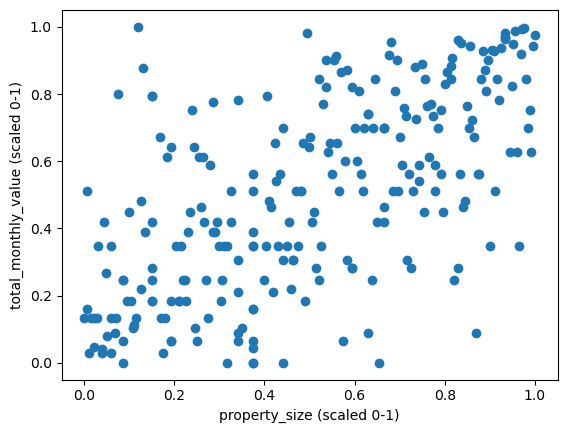

In [ ]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

x_adpt = X.values.reshape(-1, 1)
y_adpt = y.values.reshape(-1, 1)

#Scaling X  with QuantileTransformer
# n_quantiles = number of training samples (prevents warnings)
# output_distribution='uniform' -> transforms data to be between 0 and 1
qauntilet_X = QuantileTransformer(n_quantiles=len(x_adpt), output_distribution='uniform')
X_scaled = qauntilet_X.fit_transform(x_adpt)

quantilet_y = QuantileTransformer(n_quantiles=len(y_adpt), output_distribution='uniform')
y_scaled = quantilet_y.fit_transform(y_adpt)

plt.scatter(X_scaled, y_scaled)
plt.xlabel("property_size (scaled 0-1)")
plt.ylabel("total_monthly_value (scaled 0-1)")
plt.show()



This plot contains all the previous data but scaled.

The next step is setting up the our first prediction

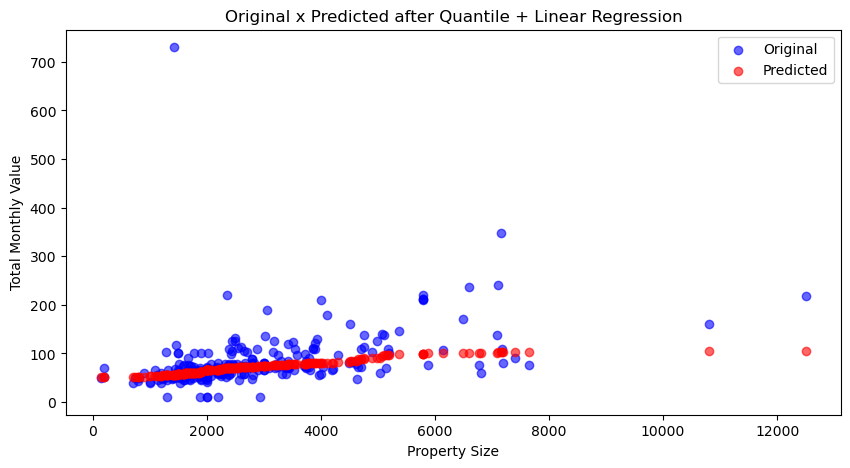

In [ ]:
LR = LinearRegression()
LR.fit(X_scaled, y_scaled.ravel())

#Predict and inverse transform to original scale

y_pred_scaled = LR.predict(X_scaled)
y_pred = quantilet_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
# Plot original vs predicted
plt.figure(figsize=(10,5))

# Original data
plt.scatter(x_adpt, y_adpt, color='blue', alpha=0.6, label='Original')

#Predicted data
plt.scatter(x_adpt, y_pred, color='red', alpha=0.6, label='Predicted')

plt.xlabel("Property Size")
plt.ylabel("Total Monthly Value")
plt.title("Original x Predicted after Quantile + Linear Regression")
plt.legend()
plt.show()

As we can see in the plot, the predicted values (in red) do not follow the same trend as the original data (in blue). This indicates that the linear regression model was not able to capture a clear relationship between property size and total monthly value.  

This result is expected because the dataset has few features and a high level of variability. In the real world, rentals are not fixed by the features the owners set values based on their own expectations, and there is no fixed pattern. Even if there were some kind of "price table", the lack of additional information (such as neighborhood value, points of interest nearby, accessibility, or even demand in the area) would still make it hard to properly estimate the rent price.  

I found out that this fact was an important learning outcome: while working with machine learning, the quality and richness of the dataset it's going to be the pillar of what answer you will recieve, and often matters more than the complexity of the model.



 ###### Some common regression evaluation metrics such as **MAE**, **MSE**, and **R²score**, to illustrate how the model is performing numerically:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# MAE = mean absolute error, average size of errors
print("MAE:", mean_absolute_error(y_adpt, y_pred))

# MSE = mean squared error, bigger errors count more
print("MSE:", mean_squared_error(y_adpt, y_pred))

# R2  = how much of the variance the model explains (1 = perfect, 0 = just predicting mean)
print("R2:", r2_score(y_adpt, y_pred))

MAE: 24.44361230348634
MSE: 3199.9087678057303
R2: 0.08688668180482462
